In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from scipy import stats
%matplotlib inline

In [230]:
#load data into python. engine='python' allows the csv to be loaded into python
df=pd.read_csv('datacleanchallenge.csv', engine='python')
#changes the column names to make them easier to work with
df.columns = ['ID','Publisher','Journal_title', 'Article_title', 'Cost']
#gives type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
ID               1928 non-null object
Publisher        2127 non-null object
Journal_title    2126 non-null object
Article_title    2127 non-null object
Cost             2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


To complete this challenge, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

In [231]:
from string import printable
st = set(printable)
df["Cost"] = df["Cost"].apply(lambda x: ''.join(["" if  i not in  st else i for i in x]))
df['Cost'] = df['Cost'].astype('str')
df['Cost'] = df['Cost'].str.strip()

#determines if there are any rows in cost column with '$'
only_numbers = df['Cost'].str.contains('$',regex = False)
#determines the numbers of rows with '$'
only_numbers.value_counts()
#determines the numbers of rows with '$'
only_numbers.value_counts()
#removes any $ in cost column
df['Cost'] = df['Cost'].str.replace('$', '')
#converts cost column into float
df['Cost'] = df['Cost'].astype('float')





In [232]:
df.head()

,ID,Publisher,Journal_title,Article_title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88


In [233]:
#puts all journal titles as lowercase and then determines the counts of the journals. This solves the problems of random capitalizations.
df['Journal_title'] = df['Journal_title'].str.lower()
#removes any white space before and after the journal name
df['Journal_title'] = df['Journal_title'].str.strip()
#replaces any double-spaced parts with single-spaced
df['Journal_title'] = df['Journal_title'].str.replace('  ', '')
#counts the journal totals
lower_casedf_count = df['Journal_title'].value_counts()

In [234]:
#creates a list of the top 20 journals
lower_casedf_count.head(20)

plos one                                           190
journal of biological chemistry                     53
neuroimage                                          29
nucleic acids research                              26
plos genetics                                       24
plos pathogens                                      24
proceedings of the national academy of sciences     22
plos neglected tropical diseases                    20
nature communications                               19
human molecular genetics                            19
bmc public health                                   14
brain                                               14
journal of neuroscience                             13
movement disorders                                  13
biochemical journal                                 12
developmental cell                                  12
journal of general virology                         11
current biology                                     11
plosone   

Top 5 journal: plos one, journal of biological chemistry, neuroimage, nucleic acids research, and plos genetics

[77, 167, 168, 169, 170, 171, 172, 173]
mean:  1974.1304473684208
median:  898.475
std:  13871.539000619297


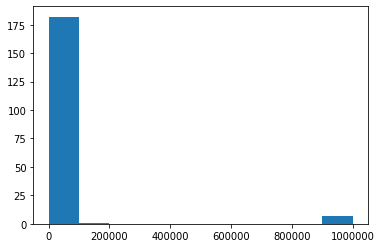

In [323]:
#create a dataframe of only plos one journal
plos_one = df[df['Journal_title'] == 'plos one']

#finds the mean
np.mean(plos_one['Cost'])
plt.hist(plos_one['Cost'])
#gives index numbers of data points that are outliers
plos_one_wrong = [idx for idx, val in enumerate(plos_one['Cost']) if val > 50000]
#gives indices of outliers
print(plos_one_wrong)
#resets the index numbers in dataframe
plos_one = plos_one.reset_index()
#replaces the outlier values with 95 percentile values
plos_one['Cost'] = plos_one['Cost'].replace(999999.0, plos_one['Cost'].quantile(.95))

print('mean: ', np.mean(plos_one['Cost']))
print('median: ', np.median(plos_one['Cost']))
print('std: ', np.std(plos_one['Cost']))


[47]
mean:  1440.5935471698112
median:  1314.53
std:  422.30246568063734


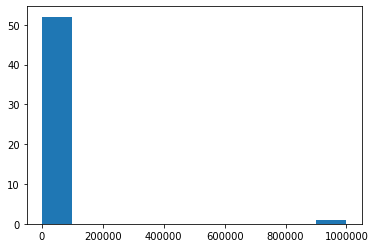

In [314]:
jobc = df[df['Journal_title'] == 'journal of biological chemistry']

#finds the mean
np.mean(jobc['Cost'])
#graphs outliers
plt.hist(jobc['Cost'])
#gives index numbers of data points that are outliers
jobc_wrong = [idx for idx, val in enumerate(jobc['Cost']) if val > 100000]
#gives indices of outliers
print(jobc_wrong)
#resets the index numbers in dataframe
jobc = jobc.reset_index()
#replaces the outlier values with 95 percentile values
jobc['Cost'] = jobc['Cost'].replace(999999.0, jobc['Cost'].quantile(.95))

print('mean: ', np.mean(jobc['Cost']))
print('median: ', np.median(jobc['Cost']))
print('std: ', np.std(jobc['Cost']))

mean:  2215.168275862069
median:  2326.43
std:  262.0161331841066


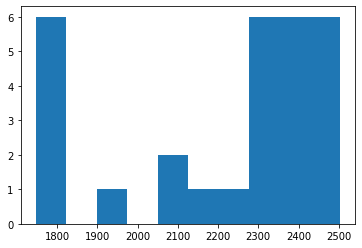

In [312]:
neuro = df[df['Journal_title'] == 'neuroimage']
#finds the mean
#np.mean(neuro['Cost'])
#graphs outliers
plt.hist(neuro['Cost'])
#gives index numbers of data points that are outliers
#neuro_wrong = [idx for idx, val in enumerate(neuro['Cost']) if val > 100000]
#gives indices of outliers
#print(neuro_wrong)
#resets the index numbers in dataframe
#neuro = neuro.reset_index()
#replaces the outlier values with 95 percentile values
#neuro['Cost'] = neuro['Cost'].replace(999999.0, neuro['Cost'].quantile(.95))

print('mean: ', np.mean(neuro['Cost']))
print('median: ', np.median(neuro['Cost']))
print('std: ', np.std(neuro['Cost']))

mean:  1149.0
median:  852.0
std:  434.33884326552095


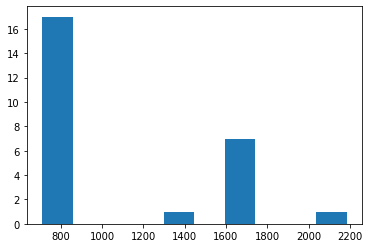

In [327]:
nar = df[df['Journal_title'] == 'nucleic acids research']
#finds the mean
np.mean(nar['Cost'])
#graphs outliers
plt.hist(nar['Cost'])
#gives index numbers of data points that are outliers
#neuro_wrong = [idx for idx, val in enumerate(neuro['Cost']) if val > 100000]
#gives indices of outliers
#print(neuro_wrong)
#resets the index numbers in dataframe
#neuro = neuro.reset_index()
#replaces the outlier values with 95 percentile values
#neuro['Cost'] = neuro['Cost'].replace(999999.0, neuro['Cost'].quantile(.95))

print('mean: ', np.mean(nar['Cost']))
print('median: ', np.median(nar['Cost']))
print('std: ', np.std(nar['Cost']))